In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
padding_type = 'post'
trunc_type = 'post'
oov_token = "<SOHUG>"
training_size = 20000

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2022-05-16 09:43:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-05-16 09:43:28 (206 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [24]:
with open("/tmp/sarcasm.json", 'r') as f:
  dataset = json.load(f)

sentences = []
labels = []

In [25]:
for item in dataset:
  sentences.append(item['headline'])
  labels.append(item["is_sarcastic"])

In [26]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [27]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.index_word

In [28]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

In [29]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [30]:
training_padded.shape
#training_labels.shape

(20000, 100)

In [31]:
model = tf.keras.Sequential([
                          tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                          tf.keras.layers.GlobalAveragePooling1D(),
                          tf.keras.layers.Dense(24, activation = 'relu'),
                          tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [33]:
epochs = 30
history = model.fit(training_padded, training_labels, epochs = epochs, validation_data=(testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.6740 - accuracy: 0.5770 - val_loss: 0.6180 - val_accuracy: 0.8000 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4550 - accuracy: 0.8199 - val_loss: 0.3913 - val_accuracy: 0.8365 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3196 - accuracy: 0.8701 - val_loss: 0.3691 - val_accuracy: 0.8328 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2669 - accuracy: 0.8965 - val_loss: 0.3417 - val_accuracy: 0.8562 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2296 - accuracy: 0.9103 - val_loss: 0.3403 - val_accuracy: 0.8553 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2036 - accuracy: 0.9228 - val_loss: 0.3688 - val_accuracy: 0.8404 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1811 - accuracy: 0.9311 - val_loss: 0.3568 - val_accuracy: 0.8532 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1616 - accuracy: 0.9401 - val_loss: 0.3722 - val_accuracy: 0.8533 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

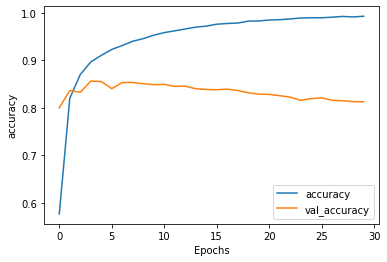

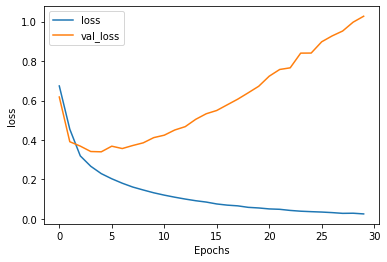

In [34]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [35]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.6065402e-01]
 [1.7675757e-04]]
